In [3]:
import sys
sys.path.append('../src')
import shutil
import yaml
import py7zr
import os
import s3fs
from satellite_image import SatelliteImage
from utils import *
import matplotlib.pyplot as plt
import numpy as np
import rasterio.plot as rp
import re
from datetime import datetime

In [ ]:
with open("../environment.yml") as f:
    environment = yaml.safe_load(f)

bucket = environment["bucket"]
path_s3_cayenne_data = environment["sources"]["cayenne"]
path_local_cayenne_data = environment["local-path"]["cayenne"]

fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})
fs.get(f"{bucket}/{path_s3_cayenne_data}", f"{path_local_cayenne_data}")
with py7zr.SevenZipFile(f"{path_local_cayenne_data}", mode="r") as z:
    z.extractall()

shutil.move(
    os.path.splitext(os.path.basename(path_s3_cayenne_data))[0],
    os.path.splitext(path_local_cayenne_data)[0],
)


In [4]:
filename = '../data/Cayenne/16bits/ORT_2022072050325085_U22N/ORT_2022072050325085_0353_0542_U22N_16Bits.jp2'
date = datetime.strptime(re.search(r'ORT_(\d{8})', filename).group(1), '%Y%m%d')

In [6]:
image = SatelliteImage.from_raster(
        filename,
        date = date, 
        n_bands = 4
    )

In [7]:
list_images = image.split(256)

In [9]:
list_images[0].normalize()

Text(0, 0.5, 'Pixels Lignes')

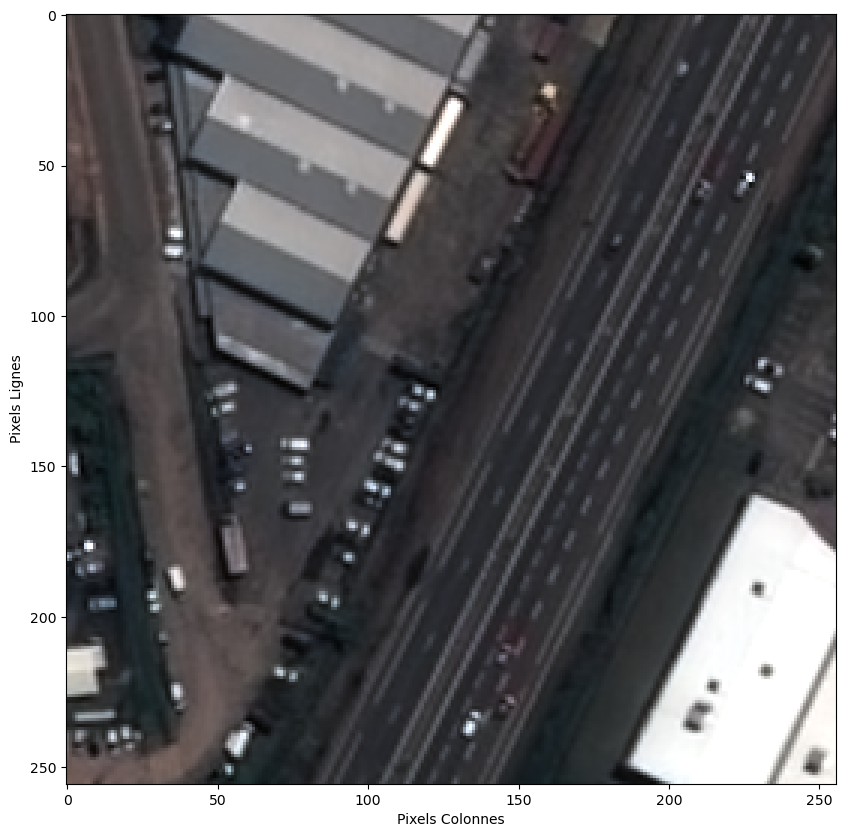

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np.transpose(list_images[0].array, (1, 2, 0))[:,:,:3])
plt.xlabel('Pixels Colonnes')
plt.ylabel('Pixels Lignes')